# Does being a tall player mean winning more air duels?

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [176]:
df_players=pd.read_json('Datasets/players.json')
df_premier=pd.read_json('Datasets/events/events_England.json')

In [177]:
df_players.head(2)

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228


In [178]:
df_players.dropna()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247
5,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1989-04-22,664,676,Jasper,right,185,Cillessen,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",J. Cillessen,83,33
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48
8,"{'name': 'France', 'id': '250', 'alpha3code': ...",1994-08-09,null,3783,Alexander,right,182,Djiku,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",A. Djiku,74,229427
9,"{'name': 'Denmark', 'id': '208', 'alpha3code':...",1992-02-14,7712,1624,Christian,right,180,Dannemann Eriksen,,"{'name': 'Denmark', 'id': '208', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",C. Eriksen,76,54


In [180]:
df_pass=df_premier[df_premier.subEventId == 10]     # selecting air duels

In [181]:
df_pass.head()

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
7,1,Duel,14.765321,177959189,2499719,1H,8013,"[{'y': 15, 'x': 39}, {'y': 20, 'x': 33}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,Duel,14.765321,177961218,2499719,1H,0,"[{'y': 85, 'x': 61}, {'y': 80, 'x': 67}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,Duel,21.878309,177959191,2499719,1H,8653,"[{'y': 46, 'x': 29}, {'y': 41, 'x': 50}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
13,1,Duel,22.551816,177959181,2499719,1H,25413,"[{'y': 54, 'x': 71}, {'y': 59, 'x': 50}]",10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
27,1,Duel,47.717508,177959210,2499719,1H,192748,"[{'y': 56, 'x': 60}, {'y': 49, 'x': 56}]",10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [182]:
df_Fin_pass=df_pass.drop(['eventName','eventSec','id','matchId','matchPeriod','positions'],axis=1)

In [183]:
df_Fin_pass.head()

,eventId,playerId,subEventId,subEventName,tags,teamId
7,1,8013,10,Air duel,"[{'id': 701}, {'id': 1802}]",1631
8,1,0,10,Air duel,"[{'id': 703}, {'id': 1801}]",1609
12,1,8653,10,Air duel,"[{'id': 703}, {'id': 1801}]",1631
13,1,25413,10,Air duel,"[{'id': 701}, {'id': 1802}]",1609
27,1,192748,10,Air duel,"[{'id': 703}, {'id': 1801}]",1631


In [184]:
dfn=df_Fin_pass.apply(lambda x: x.apply(pd.Series).stack()).reset_index(level=1,drop=True)

In [185]:
dfn["tags"]=json_normalize(dfn["tags"])

In [186]:
print(dfn.head())

    eventId  playerId  subEventId subEventName    tags  teamId
7       1.0    8013.0        10.0     Air duel  1802.0  1631.0
7       NaN       NaN         NaN          NaN  1802.0     NaN
8       1.0       0.0        10.0     Air duel   703.0  1609.0
8       NaN       NaN         NaN          NaN   703.0     NaN
12      1.0    8653.0        10.0     Air duel   701.0  1631.0


In [187]:
dfn['playerId'].value_counts().head()

0.0         2972
38031.0      497
8747.0       426
3577.0       396
293687.0     395
Name: playerId, dtype: int64

In [188]:
dfn.dropna().head()

,eventId,playerId,subEventId,subEventName,tags,teamId
7,1.0,8013.0,10.0,Air duel,1802.0,1631.0
8,1.0,0.0,10.0,Air duel,703.0,1609.0
12,1.0,8653.0,10.0,Air duel,701.0,1631.0
13,1.0,25413.0,10.0,Air duel,1802.0,1609.0
27,1.0,192748.0,10.0,Air duel,1802.0,1631.0


In [189]:
#playerId: the identifier of the player who generated the event.
#The identifier refers to the field "wyId" in a player dataset;

In [190]:
my_df= df_players.merge(dfn, left_on='wyId', right_on='playerId')

In [191]:
my_df

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId,eventId,playerId,subEventId,subEventName,tags,teamId
0,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,701.0,1624.0
1,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1802.0,1624.0
2,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,703.0,1624.0
3,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,701.0,1624.0
4,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,703.0,1624.0
5,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1802.0,1624.0
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,703.0,1624.0
8,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1802.0,1624.0
9,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0


In [192]:
temp1=my_df.loc[my_df['tags'] == 1801.0]

In [193]:
temp1

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId,eventId,playerId,subEventId,subEventName,tags,teamId
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
9,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
12,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
14,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
21,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
23,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
28,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",T. Alderweireld,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0
61,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48,1.0,48.0,10.0,Air duel,1801.0,1624.0
63,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48,1.0,48.0,10.0,Air duel,1801.0,1624.0
64,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48,1.0,48.0,10.0,Air duel,1801.0,1624.0


In [194]:
airDuel=temp1.groupby('playerId')['tags'].value_counts().reset_index(name='counts')

In [195]:
temp2=my_df.loc[my_df['tags'] == 1802.0]

In [196]:
not_airDuel=temp2.groupby('playerId')['tags'].value_counts().reset_index(name='counts')

In [197]:
airDuel['ratio']=airDuel['counts']/not_airDuel['counts']

In [198]:
airDuel.head()

,playerId,tags,counts,ratio
0,36.0,1801.0,7,1.750000
1,38.0,1801.0,2,0.666667
2,48.0,1801.0,7,1.750000
3,54.0,1801.0,1,1.000000
4,56.0,1801.0,2,0.400000


In [199]:
results=pd.merge(my_df,airDuel)

In [200]:
results

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,...,weight,wyId,eventId,playerId,subEventId,subEventName,tags,teamId,counts,ratio
0,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
1,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
2,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
3,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
4,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
5,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
6,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1989-03-02,5629,1624,Toby,right,187,Alderweireld,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,91,36,1.0,36.0,10.0,Air duel,1801.0,1624.0,7,1.750000
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,88,48,1.0,48.0,10.0,Air duel,1801.0,1624.0,7,1.750000
8,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,88,48,1.0,48.0,10.0,Air duel,1801.0,1624.0,7,1.750000
9,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",...,88,48,1.0,48.0,10.0,Air duel,1801.0,1624.0,7,1.750000


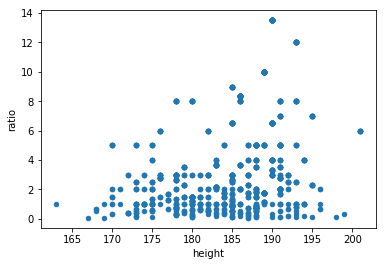

In [201]:
results.plot.scatter(x='height', y='ratio')

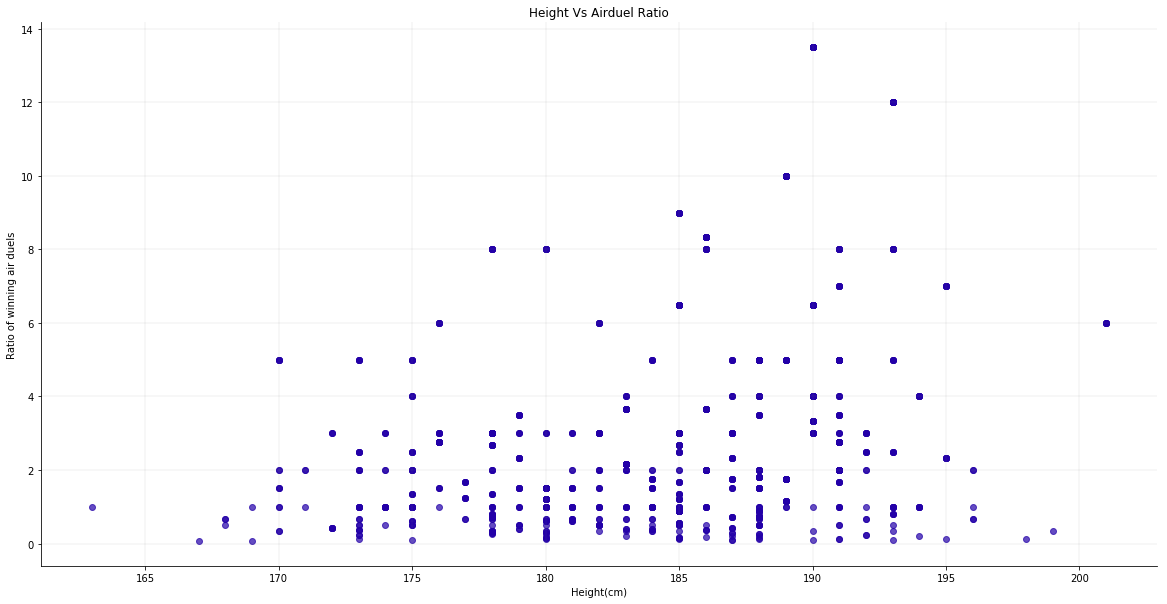

In [202]:
def scatterplot(df, x_dim, y_dim):
    x = df[x_dim]
    y = df[y_dim]
    
    fig, ax = plt.subplots(figsize=(20,10))
  #defining an array of colors  
    colors = ['#2300A8']
    ax.scatter(x, y,alpha=0.70, color=colors)
  #adds a title and axes labels
    ax.set_title('Height Vs Airduel Ratio')
    ax.set_xlabel('Height(cm)')
    ax.set_ylabel('Ratio of winning air duels')
  #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
  #adds major gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
scatterplot(results, 'height', 'ratio')